In [642]:
#imported packages
install.packages("ggplot2")
install.packages("dplyr")
install.packages("GGally")
install.packages("gridExtra")
install.packages("corrplot")
install.packages("car")
install.packages("olsrr")
install.packages("recipes")
install.packages("rsample")
install.packages("leaps")  
library(leaps)
library(rsample)
library(recipes)
library(olsrr)
library(car)
library(corrplot)
library(gridExtra)
library(ggplot2)
library(dplyr)
library(GGally)
library(patchwork)


Die heruntergeladenen Bin"arpakete sind in 
	/var/folders/3d/kg4tshsj6f596wfplb8hzsgw0000gn/T//RtmpdoB8Rz/downloaded_packages

Die heruntergeladenen Bin"arpakete sind in 
	/var/folders/3d/kg4tshsj6f596wfplb8hzsgw0000gn/T//RtmpdoB8Rz/downloaded_packages

Die heruntergeladenen Bin"arpakete sind in 
	/var/folders/3d/kg4tshsj6f596wfplb8hzsgw0000gn/T//RtmpdoB8Rz/downloaded_packages

Die heruntergeladenen Bin"arpakete sind in 
	/var/folders/3d/kg4tshsj6f596wfplb8hzsgw0000gn/T//RtmpdoB8Rz/downloaded_packages

Die heruntergeladenen Bin"arpakete sind in 
	/var/folders/3d/kg4tshsj6f596wfplb8hzsgw0000gn/T//RtmpdoB8Rz/downloaded_packages

Die heruntergeladenen Bin"arpakete sind in 
	/var/folders/3d/kg4tshsj6f596wfplb8hzsgw0000gn/T//RtmpdoB8Rz/downloaded_packages

Die heruntergeladenen Bin"arpakete sind in 
	/var/folders/3d/kg4tshsj6f596wfplb8hzsgw0000gn/T//RtmpdoB8Rz/downloaded_packages

Die heruntergeladenen Bin"arpakete sind in 
	/var/folders/3d/kg4tshsj6f596wfplb8hzsgw0000gn/T//RtmpdoB8Rz/down

In [643]:
car_data <- read.csv("data/CarPrice.csv")
head(car_data)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,...,<int>,<chr>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<dbl>
1,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
2,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
3,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
4,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
5,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
6,6,2,audi fox,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250


The dataset includes 205 rows and 26 columns. It has no missing values and no duplicate values, ensuring data quality for machine learning purposes.
The dataset originally contains 25 covariates, but some of them are redundant or challenging to interpret. For example, features like car
width, car height, car length, and car weight all
represent similar car's attributes. To reduce redundancy, we decided to
keep one of these attributes that best represents the car's size. Additionally, features such as car_ID and symboling are
difficult to interpret and do not appear to provide meaningful
information about the car's characteristics. These features were deemed irrelevant to our analysis, so we drop these features. After filtering, the dataset now contains 14 relevant features(includes
output), improving both interpretability and focus for analysis.



* The dataset was published in 2019. The exact timeframe of data collection is not specified. 
All features are measured in U.S. customary units, and all data points are from vehicles in the U.S.


| Variable  | Type               | Description                                   | Unit          
|-----------|--------------------|-----------------------------------------------|---------------|
| fueltype  | Binary Categorical | The type of fuel the car uses: "gas" or "diesel" |
| aspiration  | Categorical | the type of aspiration used in the car's engine |
| doornumber  | Categorical | the number of doors on the car |
| drivewheel  | Cateogrical | the drive wheel type of car |
| enginelocation | Categorical | the location of the engine in the car |
| carlength | Numerical | the overall length of the car | inch |
| enginesize | Numerical | the size of the engine |  cubic inches |
| cylindernumber | Categorical | the number of cylinders in the car's engine |
| horsepower | Numerical | the power of the engine |  hp |
| peakrpm | Numerical | the engine's maximum revolution per minute at the peak power | peak revolutions per minute |
| citympg | Numerical | the fuel efficiency in miles per gallon driving in city| miles per gallo |
|price | Numerical | the price of the car | US dollar |


*  What are the key features that contribute to the car price predictions in a multiple linear regression model using best subset selection?



 The Chinese automobile company Geely Auto aims to enter the U.S. market by establishing a local manufacturing facility and producing cars domestically. A high accuracy predictive model can help Geely Auto to determine their pricing strategy based on the specific car features in the competitive U.S. market. This analysis will not only identify which features American consumers value the most but also demonstrate how these features impact car prices. By understanding the influence of car features, Geely Auto can succesfully price their new cars to match with market expectations, ensuring their entry into the U.S. market is aligned with consumer preferences.


In [644]:
selected_columns <- c("fueltype", "aspiration", "doornumber","drivewheel", 
                       "carlength", "enginesize",
                    "horsepower", "peakrpm", "citympg", "price", "enginelocation", "cylindernumber")
car_data <- car_data[selected_columns]
head(car_data)

,fueltype,aspiration,doornumber,drivewheel,carlength,enginesize,horsepower,peakrpm,citympg,price,enginelocation,cylindernumber
,<chr>,<chr>,<chr>,<chr>,<dbl>,<int>,<int>,<int>,<int>,<dbl>,<chr>,<chr>
1,gas,std,two,rwd,168.8,130,111,5000,21,13495,front,four
2,gas,std,two,rwd,168.8,130,111,5000,21,16500,front,four
3,gas,std,two,rwd,171.2,152,154,5000,19,16500,front,six
4,gas,std,four,fwd,176.6,109,102,5500,24,13950,front,four
5,gas,std,four,4wd,176.6,136,115,5500,18,17450,front,five
6,gas,std,two,fwd,177.3,136,110,5500,19,15250,front,five


In [645]:
summary(car_data)

   fueltype          aspiration         doornumber         drivewheel       
 Length:205         Length:205         Length:205         Length:205        
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                                                                            
                                                                            
   carlength       enginesize      horsepower       peakrpm        citympg     
 Min.   :141.1   Min.   : 61.0   Min.   : 48.0   Min.   :4150   Min.   :13.00  
 1st Qu.:166.3   1st Qu.: 97.0   1st Qu.: 70.0   1st Qu.:4800   1st Qu.:19.00  
 Median :173.2   Median :120.0   Median : 95.0   Median :5200   Median :24.00  
 Mean   :174.0   Mean   :126.9   Mean   :104.1   Mean   :5125   Mean   :25.22  
 3rd Qu.:183.1   3rd Qu.:141.0   3rd Qu.:116.0   3rd Qu.:5500


# Data Visualization:

In [646]:
missing_value <- sum(is.na(car_data))
missing_value

[1] 0

It is a decent dataset that doesn't have any missing value.

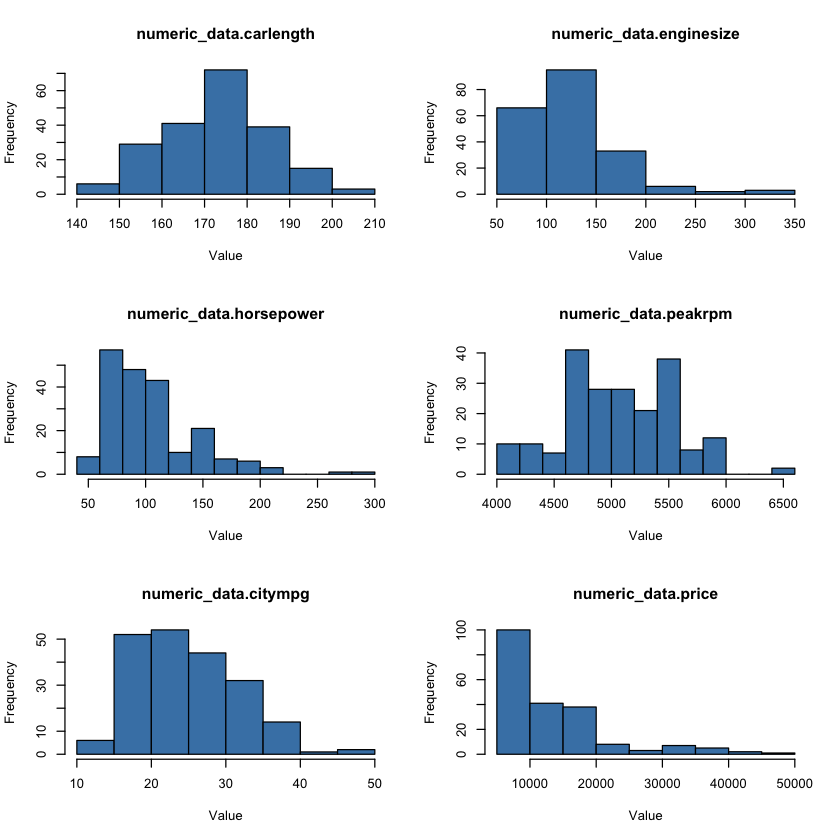

In [647]:
numeric_data <- car_data %>% select_if(is.numeric)
par(mfrow = c(3, 2))
car_data_n <- data.frame(
  numeric_data$carlength,
  numeric_data$enginesize,
  numeric_data$horsepower,
  numeric_data$peakrpm,
  numeric_data$citympg,
  numeric_data$price
)
for (i in 1:ncol(car_data_n)) {
  hist(car_data_n[[i]], main = colnames(car_data_n)[i], xlab = "Value", col = "steelblue", border = "black")
}



1) The distributions of horsepower and engine size are right-skewed, which may violate the assumption of the linear model assumptions, such as linearity and homoscedasticity, and might potentially affect the model’s performance. To address this, we will log transform these two features to reduce skewness.

2) The response variable price is also skewed, however, we don't usually change the output if the linear model assumptions are all met, so we will firstly keep it unchanged. 

In [648]:
car_data$horsepower <- log(car_data$horsepower)
car_data$enginesize <- log(car_data$enginesize)

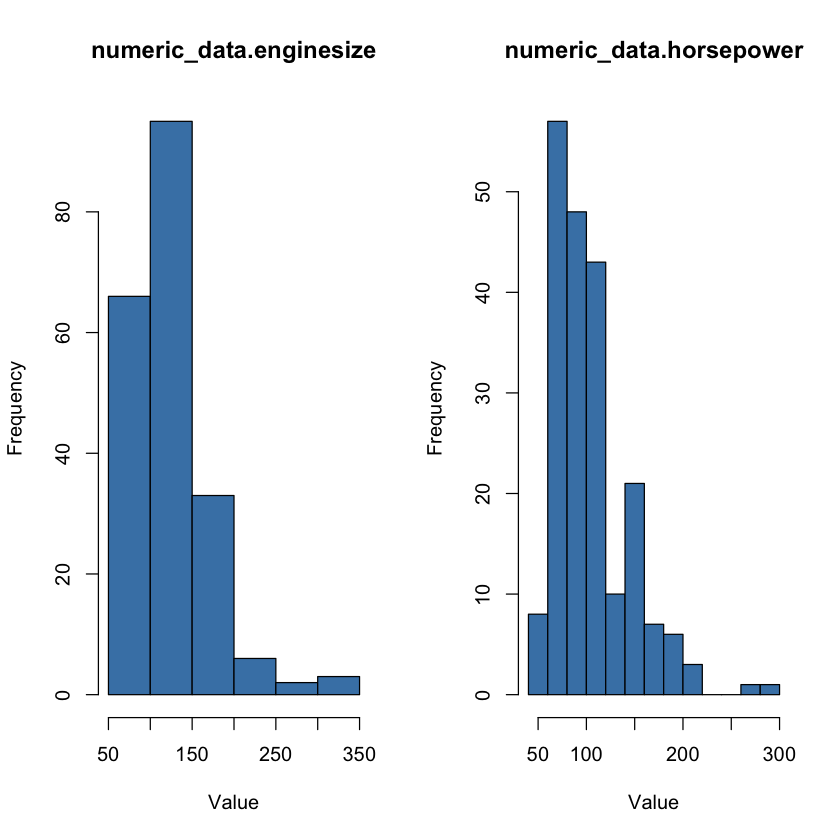

In [649]:
par(mfrow = c(1, 2))
car_data_n <- data.frame(
  numeric_data$enginesize,
  numeric_data$horsepower
)
for (i in 1:ncol(car_data_n)) {
  hist(car_data_n[[i]], main = colnames(car_data_n)[i], xlab = "Value", col = "steelblue", border = "black")
}

Now, the distributions for these features look better.

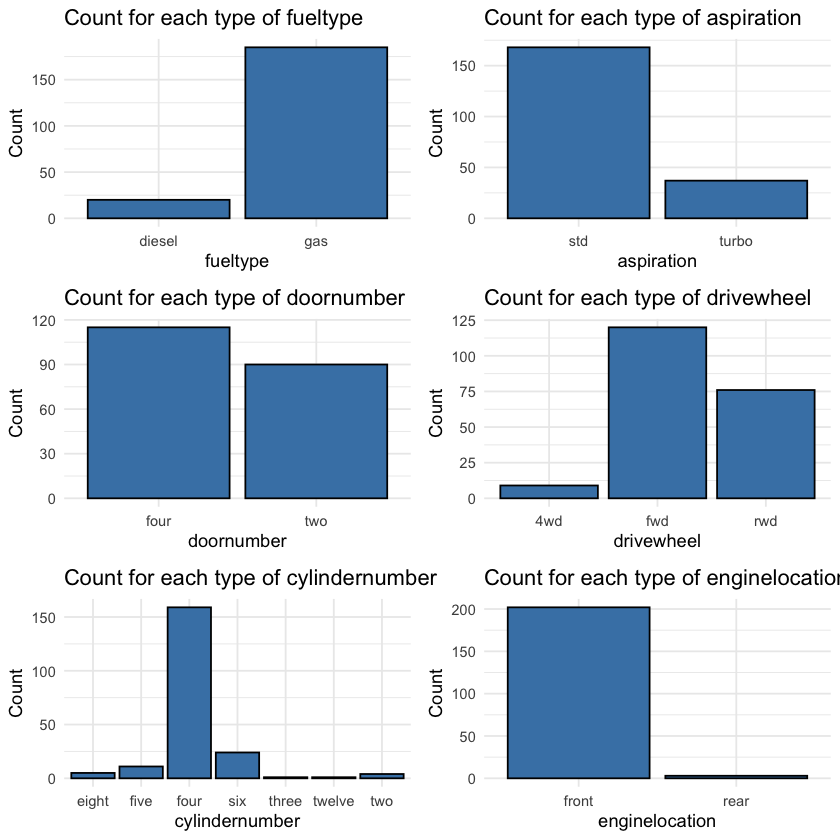

In [650]:
plots <- list()
categorical_columns <- c('fueltype','aspiration','doornumber','drivewheel', "cylindernumber", "enginelocation")

for (cat_col in categorical_columns) {
  p <- ggplot(car_data, aes_string(x = cat_col)) +
    geom_bar(fill = "steelblue", color = "black") +
    labs(title = paste("Count for each type of", cat_col), x = cat_col, y = "Count") +
    theme_minimal()
  
  plots[[cat_col]] <- p 
}

grid.arrange(grobs = plots, ncol = 2)

We notice that there are several class imbalance cases. 
1) Fueltype(class imbalance):
* Categories: "diesel" and "gas."
* Most vehicles use gas; significantly fewer using diesel.
2) Aspiration(class imbalance):
* Categories: "std" and "turbo."
* Most vehicles have "std" aspiration; fewer having "turbo" aspiration.
3) Doornumber:

* Categories: "four" and "two."

4) Drivewheel(class imbalance):

* Categories: "4wd," "fwd," and "rwd."
* "fwd" (front-wheel drive) is the most common, followed by "rwd" (rear-wheel drive). "4wd" (four-wheel drive) is the least common.
5) Enginelocation(class imbalance):

* Categories: "front" and "rear."
* Nearly all vehicles have their engines located in the front; very few having engines in the rear.
6) Cylindernumber(class imbalance):

* Categories: "two," "three," "four," "five," "six," "eight," and "twelve."
* The most common category is "four" cylinders, followed by "six." Other configurations, such as "three," "five," "two," "eight," and "twelve," are relatively rare.

##### 1) Drivewheel
##### 2) Engine location
##### 3) Cylinder number

These features have highly imbalanced class distributions. Such imbalance can negatively effect the model's general performance, as the model may overfit to the majority classes while underfitting the minority classes. To avoid potential problem, we have decided to exclude these features.

In [651]:
car_data <- car_data %>% select(- "cylindernumber", -"enginelocation", - "drivewheel")

# Investigate Multicollinearity:

In [655]:
numeric_data <- car_data %>% select_if(is.numeric)
car_data_new <- car_data %>% 
  mutate_at(c("fueltype", "aspiration", "doornumber"), 
            as.factor)

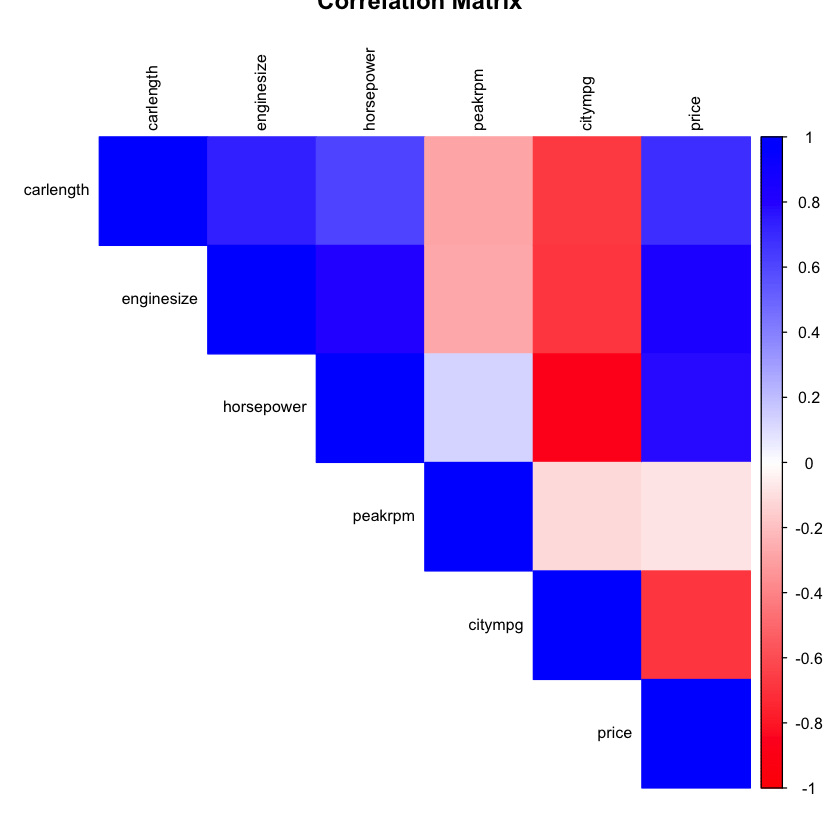

In [656]:
cor_matrix <- cor(numeric_data, use = "complete.obs")
corrplot(cor_matrix, 
         method = "color",          
         type = "upper",            
         tl.col = "black",         
         tl.cex = 0.8,             
         col = colorRampPalette(c("red", "white", "blue"))(200),
         title = "Correlation Matrix")


* horsepower and enginesize are highly correlated

To further investigate, we compute VIF for each feature. 

In [657]:
vif_model <- lm(price ~ ., data = numeric_data)
vif_vals <- vif(vif_model)
vif_df <- data.frame(
  Variable = names(vif_vals),
  VIF = vif_vals
)
vif_df

,Variable,VIF
,<chr>,<dbl>
carlength,carlength,2.816327
enginesize,enginesize,6.116893
horsepower,horsepower,9.214057
peakrpm,peakrpm,1.902109
citympg,citympg,5.237289


It seems that the VIFs for horsepower is near to 10. It is reasonable for us to drop this features to reduce the risk of causing multicollinearity 

In [658]:
car_data_new <- car_data_new %>% select(-horsepower)


# Perform Best Subset Selection:

##### why best subset selection?
* Unlike forward selection which relies on sequatial inclusion of the covariates, best subset selection evaluates all possible combinations of the covariates. This ensures that the final model is robust and not influenced by the order in which the covariates are added.  

In [739]:
car_split <- initial_split(car_data_new, prop = 0.7, strata = price)
car_selection <-  training(car_split)
car_model <- testing(car_split)

To address post-inference bias, we split the dataset into two subsets: a selection set and a modeling set. The best subset selection process is performed on the selection set to determine the optimal group of variables. This separation ensures that the modeling set remains independent for model evaluation.

In [740]:
s = regsubsets(price ~., data=car_selection, method="exhaustive", nvmax = 10)
ss = summary(s)
ss
summary_df_select <- data.frame(
  n_coefficients = 2:8,
  n_covariates = 1:7,       
  RSQ = ss$rsq,   
  ADJ.R2 = ss$adjr2,
  RSS = ss$rss )

Subset selection object
Call: regsubsets.formula(price ~ ., data = car_selection, method = "exhaustive", 
    nvmax = 10)
7 Variables  (and intercept)
                Forced in Forced out
fueltypegas         FALSE      FALSE
aspirationturbo     FALSE      FALSE
doornumbertwo       FALSE      FALSE
carlength           FALSE      FALSE
enginesize          FALSE      FALSE
peakrpm             FALSE      FALSE
citympg             FALSE      FALSE
1 subsets of each size up to 7
Selection Algorithm: exhaustive
         fueltypegas aspirationturbo doornumbertwo carlength enginesize peakrpm
1  ( 1 ) " "         " "             " "           " "       "*"        " "    
2  ( 1 ) " "         " "             " "           " "       "*"        " "    
3  ( 1 ) "*"         " "             " "           " "       "*"        " "    
4  ( 1 ) "*"         " "             " "           " "       "*"        "*"    
5  ( 1 ) "*"         " "             " "           "*"       "*"        "*"    
6  ( 1 ) "

In [741]:
full_model <- lm(price ~ ., data = car_selection)
full_rss  <- sum(residuals(full_model)^2)
rss <- summary_df_select$RSS
n <- nrow(car_selection)
sigma2 <- full_rss/ (n - 8)
Cp <- (rss / sigma2) - (n - 2 * (2:8))
summary_df_select$Cp = Cp
summary_df_select

n_coefficients,n_covariates,RSQ,ADJ.R2,RSS,Cp
<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
2,1,0.7015332,0.6993860,2456772425,41.581584
3,2,0.7400973,0.7363306,2139339895,20.507569
4,3,0.7558260,0.7504792,2009871430,13.096570
5,4,0.7723592,0.7656639,1873781854,5.204285
6,5,0.7761280,0.7678364,1842759814,4.949308
7,6,0.7772224,0.7672472,1833751690,6.294512
8,7,0.7777146,0.7660154,1829700045,8.000000


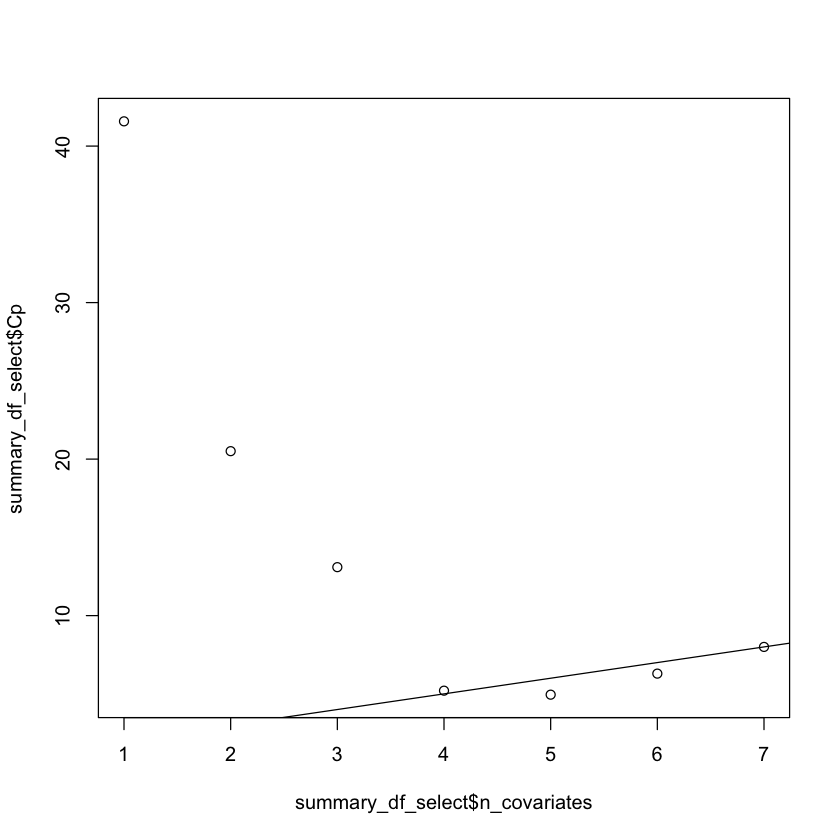

In [742]:
plot(summary_df_select$n_covariates, summary_df_select$Cp)
abline(a = 1, b = 1)

* Model with 5 covariates has the highest adjusted R^2.
* Model with 6 covariates has the suitable Cp that is closest to number of covariates+1

We will select the features identified in these two models and fit two multiple linear regression models—one with the three features from Model 4 and another with the four features from Model 5—using the modeling set. 

In [743]:
library(caret)
car_lmone <- lm(price ~ fueltype  + aspiration + enginesize + peakrpm + citympg , data = car_model)
car_lmtwo <- lm(price ~ fueltype  + aspiration + enginesize + peakrpm + citympg + carlength , data = car_model)
summary(car_lmone)
summary(car_lmtwo)


Call:
lm(formula = price ~ fueltype + aspiration + enginesize + peakrpm + 
    citympg, data = car_model)

Residuals:
     Min       1Q   Median       3Q      Max 
-10785.1  -2159.9   -264.5   1837.0  11287.1 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)     -1.230e+05  2.033e+04  -6.048 1.13e-07 ***
fueltypegas     -4.431e+03  2.471e+03  -1.793   0.0782 .  
aspirationturbo -3.807e+02  1.533e+03  -0.248   0.8047    
enginesize       2.590e+04  2.911e+03   8.898 1.96e-12 ***
peakrpm          3.483e+00  1.352e+00   2.576   0.0126 *  
citympg         -6.334e+01  1.250e+02  -0.507   0.6142    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 4261 on 58 degrees of freedom
Multiple R-squared:  0.7798,	Adjusted R-squared:  0.7608 
F-statistic: 41.08 on 5 and 58 DF,  p-value: < 2.2e-16



Call:
lm(formula = price ~ fueltype + aspiration + enginesize + peakrpm + 
    citympg + carlength, data = car_model)

Residuals:
     Min       1Q   Median       3Q      Max 
-10739.5  -2273.1   -298.6   1920.9  11294.5 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)     -1.252e+05  2.590e+04  -4.834 1.05e-05 ***
fueltypegas     -4.265e+03  2.762e+03  -1.544   0.1281    
aspirationturbo -3.413e+02  1.572e+03  -0.217   0.8289    
enginesize       2.584e+04  2.970e+03   8.699 4.81e-12 ***
peakrpm          3.522e+00  1.393e+00   2.529   0.0142 *  
citympg         -5.013e+01  1.576e+02  -0.318   0.7517    
carlength        1.040e+01  7.459e+01   0.139   0.8896    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 4297 on 57 degrees of freedom
Multiple R-squared:  0.7799,	Adjusted R-squared:  0.7567 
F-statistic: 33.66 on 6 and 57 DF,  p-value: < 2.2e-16


In [744]:
residualsone <- car_lmone$residuals
sqrt(mean(residualsone^2))
residualstwo <- car_lmtwo$residuals
rmsetwo<- sqrt(mean(residualstwo^2))
table <- data.frame(model= 1:2, RMSE = c(rmseone, rmsetwo), 
adjR2 = c(summary(car_lmone)$adj.r.squared, summary(car_lmtwo)$adj.r.squared))
table

[1] 4056.315

model,RMSE,adjR2
<int>,<dbl>,<dbl>
1,2892.966,0.760827
2,4055.623,0.756714


From the table, we can see that model with 5 covariates provides the smallest RMSE and the highest adjR^2, so we will choose it as our final model.

# Check Model Assumption:

### 1. Check constant variance assumption

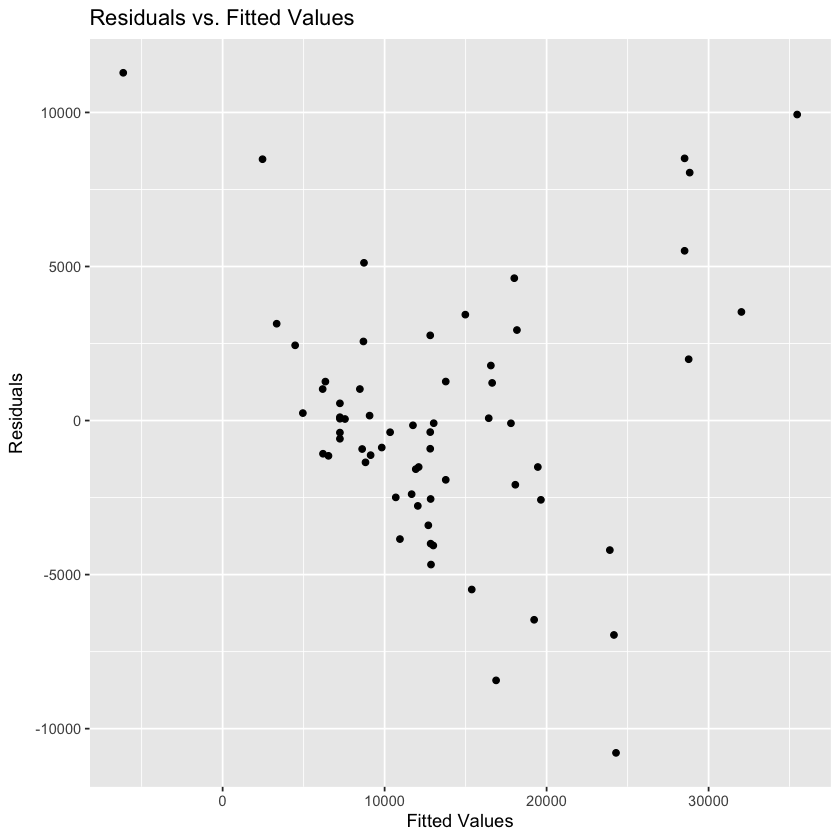

In [745]:
residuals_data <- data.frame(
  Fitted = fitted(car_lmone),
  Residuals = residuals(car_lmone) 
)
ggplot(residuals_data, aes(x = Fitted, y = Residuals)) +
  geom_point() +  
  xlab("Fitted Values") +
  ylab("Residuals") +
  ggtitle("Residuals vs. Fitted Values")


The residual plot indicates a violation of the assumption of constant variance (heteroscedasticity), as the variance of residuals appears to increase with the fitted values. To address this, we will transform the output y. Additionally, the curved pattern in the residuals suggests a non-linear relationship. To address this, we will incorporate a quadratic term, citympg^2, into the model to better capture the relationship and improve model fit. 

In [754]:
final_car_lm <- lm(log(price) ~ fueltype + aspiration + enginesize + peakrpm + citympg + I(citympg^2) , data = car_model)
summary(final_car_lm)


Call:
lm(formula = log(price) ~ fueltype + aspiration + enginesize + 
    peakrpm + citympg + I(citympg^2), data = car_model)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.55231 -0.12449  0.02651  0.12237  0.36163 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)      6.5921339  1.1795534   5.589 6.71e-07 ***
fueltypegas     -0.5699204  0.1131284  -5.038 5.06e-06 ***
aspirationturbo -0.0131281  0.0700068  -0.188   0.8519    
enginesize       0.9321099  0.1493641   6.241 5.79e-08 ***
peakrpm          0.0001401  0.0000621   2.256   0.0279 *  
citympg         -0.1142458  0.0222116  -5.144 3.45e-06 ***
I(citympg^2)     0.0014141  0.0003270   4.325 6.21e-05 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.1918 on 57 degrees of freedom
Multiple R-squared:  0.8786,	Adjusted R-squared:  0.8658 
F-statistic: 68.77 on 6 and 57 DF,  p-value: < 2.2e-16


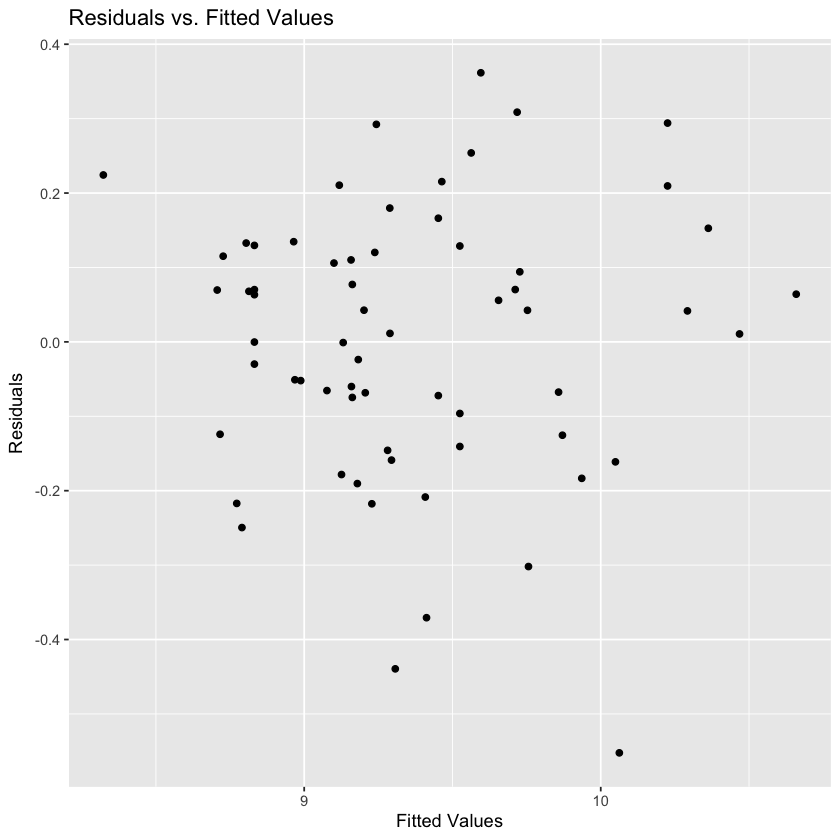

In [755]:

residuals_data <- data.frame(
  Fitted = fitted(final_car_lm),
  Residuals = residuals(final_car_lm)  
)


ggplot(residuals_data, aes(x = Fitted, y = Residuals)) +
  geom_point() +  
  xlab("Fitted Values") +
  ylab("Residuals") +
  ggtitle("Residuals vs. Fitted Values")


Now, the residual plot looks better and meets constant variance assumption.

### 2. Check Normality

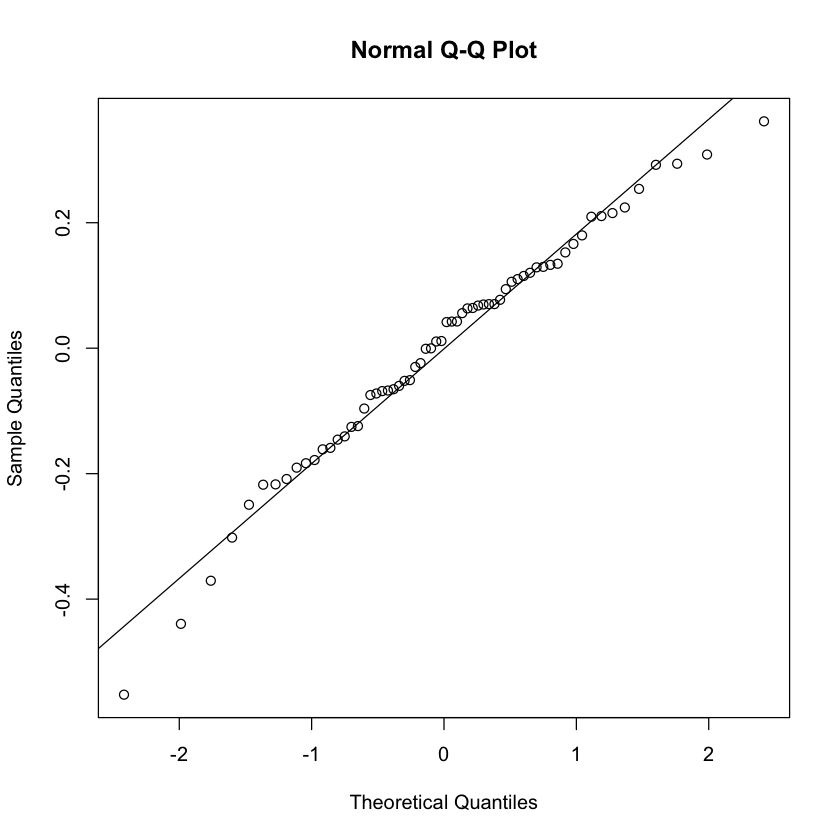

In [756]:

qqnorm(residuals_data$Residuals)
qqline(residuals_data$Residuals)

The residuals are mostly normal, there are slight deviations, which suggest a heavy-tailed distribution. However, majority of the residuals closely follow the diagonal line, suggesting that the residuals are approximately normally distributed. The issue might be alleviated when we have more data points. 


### 3. Check Independence

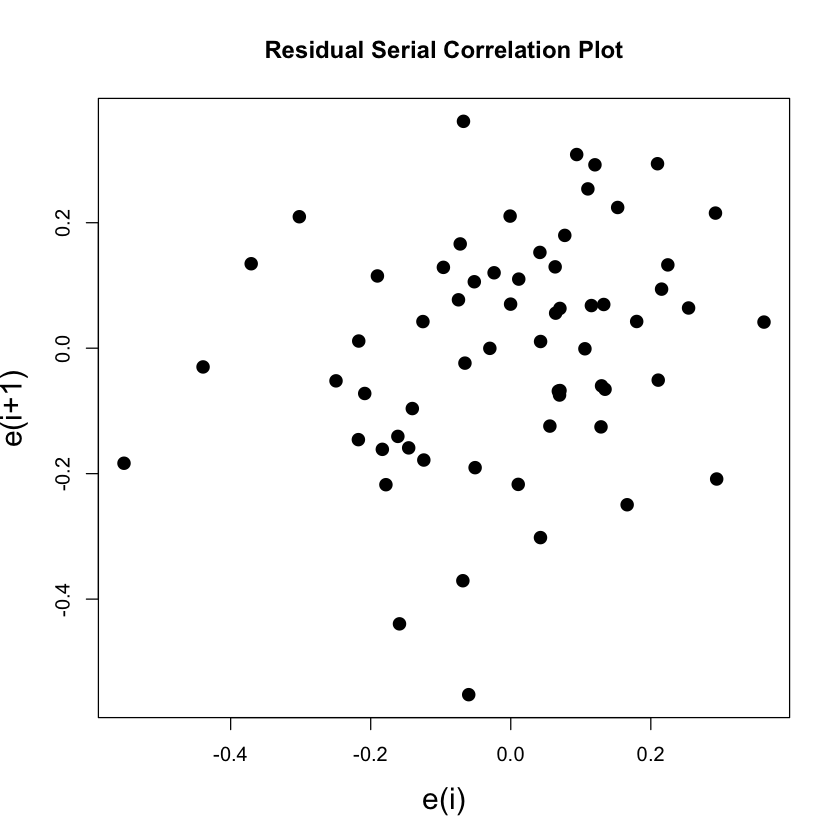

In [760]:
plot(
  head(residuals_data$Residuals, -1), 
  tail(residuals_data$Residuals, -1),  
  xlab = "e(i)", 
  ylab = "e(i+1)", 
  cex = 1.5, 
  cex.lab = 1.5, 
  pch = 16,
  main = "Residual Serial Correlation Plot"
)


The serial correlation suggests that the sequential residual ei+1 against ei show no obvious patterns, indicating that the residuals are independent of one another. 

# Conclusion:
Based on the final multiple linear regression model, the key findings are as follows:
1) Significant Predictors:
* fueltype: pvalue:
* drivewheel
* enginelocation
* carlength
* citympg
2) Non-signifcant Predictors:
* aspiration
* doornumber
* cylindernumber

| Variable  | P-value               | Signicant or not   (0.1)                               |          
|-----------|--------------------|-----------------------------------------------|
| fueltype | 0.0247 | Yes |
| aspiration | 0.0825 | Yes |
| drivewheel | 0.0106 | Yes |
| engine